In [268]:
# En esta celda se puede probar la funcion de analisis de una imagen

from lib.image import image_data
from lib.analysis import dyssynchrony_analysis
import cv2

# Path completo donde esta la imagen (incluyendo nombre y extencion)
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/imagenes/060320sel/060320dan7/'
photo_name = 'd7b001'
photo = photo_name + '.tif'
# Ancho de la feta a analisar (es un parametro opcional)
slice_width = 5

# Distancia minima en pixeles entre picos
min_dist_between_maxs = 70
# Calibracion del tiempo de cada pixel
calibration = 1

image = cv2.imread(path + photo_name + '.tif')
# Select ROI
fromCenter = False
showCrosshair = False
seleted_parameters = cv2.selectROI(image, fromCenter, showCrosshair)

# Crop image
x_start = int(seleted_parameters[1])
x_end = x_start + int(seleted_parameters[3])
y_start = int(seleted_parameters[0])
y_end = y_start + int(seleted_parameters[2])

cv2.destroyAllWindows()

image = image_data.get_image_data(image)
image = image_data.crop_vertical(image, x_start, x_end)
image = image_data.crop_horizontal(image, y_start, y_end)

results = dyssynchrony_analysis.analyze_image(image, min_dist_between_maxs, calibration, slice_width=slice_width)

ValueError: Peaks not found

In [265]:
jasonGenerator(path,results,photo_name)

In [266]:
dic = jasonReader(path + 'analysis_result_' + photo_name + '.json')
slicesParser_amplitudes(dic)

ValueError: cannot set a row with mismatched columns

In [263]:
print(results['image']['max_peaks_positions'])
for i in range(0,len(results['slices'])):
    array = results['slices'][i]['max_peaks_positions']
    print(i,array)

[49, 130, 206, 287, 361]
0 [50, 125, 204, 283, 360]
1 [49, 135, 207, 286, 370]
2 [57, 128, 206, 291, 366]
3 [48, 129, 205, 286, 367]
4 [50, 128, 207, 286, 366]
5 [51, 129, 204, 289, 361]
6 [51, 130, 205, 289, 366]
7 [50, 128, 208, 286, 369]
8 [55, 129, 207, 285, 361]
9 [47, 129, 204, 283, 362]
10 [47, 132, 204, 284, 362]
11 [49, 128, 205, 285, 361]
12 [50, 131, 205, 286, 361]
13 [50, 131, 209, 292, 367]
14 [49, 129, 209, 289, 374]
15 [50, 140, 212, 289, 365]
16 [53, 136, 209, 289, 369]
17 [51, 125, 214, 288, 372]
18 [52, 125, 211, 291, 372]
19 [49, 125, 214, 287, 369]
20 [48, 126, 206, 287, 363]
21 [48, 127, 204, 284, 358]
22 [46, 128, 203, 287, 359]
23 [47, 132, 204, 283, 360]
24 [52, 130, 206, 285, 360]
25 [49, 128, 213, 289, 361]
26 [49, 136, 289, 361]
27 [52, 132, 206, 287, 361]
28 [50, 129, 209, 287, 370]
29 [58, 131, 207, 289, 370]
30 [59, 134, 217, 291, 367]
31 [58, 135, 207, 286, 368]


In [ ]:
import matplotlib.pyplot as plt

for i in range(0,len(results['slices'])):
    array = results['slices'][i]['intensities']
    plt.plot(array) # plotting by columns
    plt.show()

# PRUEBA ANALISIS 

In [ ]:
# En esta celda se puede probar la funcion de analisis todas las imagenes .tif en un directorio
import os
from lib.image import image_data
from lib.analysis import dyssynchrony_analysis
import cv2

# Ancho de la feta a analisar (es un parametro opcional)
slice_width = 5

# Distancia minima en pixeles entre picos
min_dist_between_maxs = 200

# Calibracion del tiempo de cada pixel
calibration = 3.1

# Path donde estan las imagenes
path = "C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/1 Hz/"

images_paths = [ f'{path}/{file}' for file in os.listdir(path) if file.endswith(".tif") ]
images = [ cv2.imread(image_path) for image_path in images_paths ]

In [ ]:
fromCenter = False
showCrosshair = False

#Tomamos la primer imagen para seleccionar el recorte elegido el resto de las imagenes se van a recortar igual
seleted_parameters = cv2.selectROI(images[0], fromCenter, showCrosshair)

# Crop image
x_start = int(seleted_parameters[1])
x_end = x_start + int(seleted_parameters[3])
y_start = int(seleted_parameters[0])
y_end = y_start + int(seleted_parameters[2])

cv2.destroyAllWindows()

In [ ]:
images = [ image_data.get_image_data(image) for image in images ]
images = [ image_data.crop_vertical(image, x_start, x_end) for image in images ]
images = [ image_data.crop_horizontal(image, y_start, y_end) for image in images ]

In [ ]:
results = [(dyssynchrony_analysis.analyze_image(image, min_dist_between_maxs, calibration, slice_width=5), print ('Done')) for image in images]

# Analisis de datos
Notas: 
- Image corresponde al análisis de toda la célula y slices corresponde a fetas de esa imagen
- intensidades es el valor que resulta de comprimir (sumando) la matriz con las coordenadas de x,y,z de los pixeles 
- max_peaks_pos es la index de en la lista de intensidades 
- max_peaks_intensities el valor de intensidad que se corresponde con el pico en la posicion analoga de max_peaks_pos

In [1]:
#Imports
import json
import numpy as np
import pandas as pd

In [2]:
#encodes a dictionary into a jason
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


def jasonGenerator(path,results,photo_name):
    """ Generates a .jason file in the path given folder from the a dictionary """
    with open(path + '/analysis_result_' + photo_name + '.json',"w") as miarch:
        miarch.write(json.dumps(results, cls=NumpyEncoder))

In [3]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [4]:
def slicesParser_max_peaksI(dictres):
#extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x) for x in range(0,len(allSlices[0]['max_peaks_intensities']))]    
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    for i in range(0,len(allSlices)):
        df_sum.loc[i] = allSlices[i]['max_peaks_intensities'][0:] 
    return df_sum

In [5]:
def slicesParser_halfpeakstime(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['times_to_half_peaks']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['times_to_half_peaks']
    return df_sum

In [6]:
def slicesParser_amplitudes(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['amplitudes']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['amplitudes']
    return df_sum

In [7]:
def slicesParser_amplitudes_col(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['amplitudes']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum = pd.concat([df_sum,pd.DataFrame([jasonReader(path_file)['slices'][i]['amplitudes']])], ignore_index=True, axis=0)
    print(df_sum)
    return df_sum

In [8]:
def slicesParser_min_peaksI(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['min_peaks_intensities']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)-1):
        df_sum.loc[i+1] = allSlices[i]['min_peaks_intensities']

    return df_sum

In [9]:
def slicesParser_peaktime(dictres):
    #extract all the slices data
    allSlices = dictres['slices']

    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['times_to_peaks']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['times_to_peaks']

    return df_sum

In [10]:
def slicesParser_tau(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['tau_s']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['tau_s']

    return df_sum

In [11]:
def BasicStasts(df):
    if df.empty == False:
        return df.astype('int').describe()

In [12]:
def amplitudes_ratio(df):
    df_alt = pd.DataFrame()
    for i in range(0,len(list(df))-1):
        name = 'ratio' + str(i+1) +'-' + str(i)
        df_alt[name] = df[list(df)[i+1]]/df[list(df)[i]]
    return df_alt

In [ ]:
# path = '/home/leandro/Documentos/Analisis_de_imagenes/CardiAP/DesktopApp/photos_examples/'
photo_name = 'c1d000'
photo = photo_name + '.tif'

In [ ]:
loaded_dict = jasonReader(path)

In [ ]:
BasicStasts(slicesParser_max_peaksI(path))

In [ ]:
amplitudes_ratio(slicesParser_amplitudes(path)).std()

In [ ]:
amp_mean = slicesParser_amplitudes(path).mean()
for i in range(0,len(amp_mean)-1):
    AR_ind = (1- (amp_mean[i+1])/amp_mean[i])
    print (AR_ind)

In [ ]:
slicesParser_min_peaksI(path).head(2)

In [ ]:
slicesParser_tau(path).head()

In [13]:
def discordance_index(path):
    DIs = pd.DataFrame()
    for j in range (1, len(slicesParser_amplitudes(path).columns)):
        rel_diff = []
        for i in range (0, len (slicesParser_amplitudes(path))):
            T1 = list(slicesParser_amplitudes(path)['transient'+str(j)])[i]
            T2 = list(slicesParser_amplitudes(path)['transient'+str(j+1)])[i]
            rel_diff.append((T1-T2)/max(T1,T2))
        DIs[j] = rel_diff
    return DIs
def alternance_ratio(path):
    T1_mean = float(slicesParser_amplitudes(path)['transient1'].mean())
    T2_mean = float(slicesParser_amplitudes(path)['transient2'].mean())
    AR = (abs(T1_mean-T2_mean))/max(T1_mean, T2_mean)
    return AR

In [109]:
import os

DI_list = []
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/'
jsons_list = os.listdir(path)
file_error = []
for file in jsons_list:
    try:
        path_file = path + file
        dic = jasonReader(path_file)
        print (file)
        DI_list.append([file, discordance_index(dic).std().mean()])
    except ValueError:
        file_error.append(file)
    except IsADirectoryError:
        pass
print('Done')

311019_analysis_result_vk2b000.json
171019_analysis_result_c1c000.json
200121_analysis_result_vk2b000.json
050320c8_analysis_result_8b000.json
060121_analysis_result_vk12a000.json
031019c4_analysis_result_c4c000.json
171019_analysis_result_vk3b000.json
180221_analysis_result_vk2b000.json
200121_analysis_result_c3a000.json
180221_analysis_result_d2d000.json
071119c1sel_analysis_result_c1c002.json
060121_analysis_result_vk2c001.json
050320c6_analysis_result_6b001.json
060320_analysis_result_vk3b001.json
060320_analysis_result_vk2b001.json
311019_analysis_result_dan3b000.json
060121_analysis_result_c8d000.json
200121_analysis_result_c1c000.json
120121_analysis_result_5c000.json
031019c3_analysis_result_c3d000.json
060320c1_analysis_result_1b000.json
060121_analysis_result_c3c000.json
200121_analysis_result_c1b000.json
050320c4_analysis_result_4c001.json
060121_analysis_result_d5b000.json
050320c3_analysis_result_3c001.json
031019c4_analysis_result_c4d000.json
031019c1_analysis_result_c1e0

In [89]:
file = []
for index in range(0,len(DI_list)):
    file.append([jsons_list[index], (DI_list[index]).std().mean()])

In [110]:
import csv
import pandas as pd    

df = pd.DataFrame(DI_list, columns= ['photo_name','DI'])
df.to_csv(path + 'discordances_indexes_nuevos.csv', sep='\t')

In [111]:
with open(path + 'Failed.txt', 'w') as file:
    for item in file_error:
        file.write("%s\n" % item)

In [ ]:
arch_defectuosos = []
for i in list_archs:
    dic = jasonReader(i)
    try:
        slicesParser_max_peaksI(dic)
    except:
        arch_defectuosos.append(i)

In [ ]:
arch_defectuosos

In [102]:
import os

AR_list = []
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/'
jsons_list = os.listdir(path)
for file in jsons_list:
    try:
        path_file = path + file
        dic = jasonReader(path_file)
        T1_mean = dic['image']['amplitudes'][0]
        T2_mean = dic['image']['amplitudes'][1]
        AR_list.append([file, (abs(T1_mean-T2_mean))/max(T1_mean, T2_mean)])
    except IsADirectoryError:
        pass
print('Done')

Done


In [103]:
import csv
import pandas as pd    

df = pd.DataFrame(AR_list, columns= ['photo_name','AR'])
df.to_csv(path + 'alternance_ratio_nuevos.csv', sep='\t')

In [13]:
disc_index = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/discordances_indexes_nuevos.csv', encoding='utf-8', sep='\t')
del disc_index['Unnamed: 0']

In [30]:
disc_index.head()

,photo_name,DI,tratamiento,frecuencia
0,311019_analysis_result_vk2b000.json,0.090926,vk,3.0
1,171019_analysis_result_c1c000.json,0.125577,c,4.0
2,060121_analysis_result_vk12a000.json,NaN,vk,1.0
3,031019c4_analysis_result_c4c000.json,0.101607,c,3.0
4,171019_analysis_result_vk3b000.json,0.275692,vk,3.0


In [37]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
c_1 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 1)]
del c_1['tratamiento']
del c_1['frecuencia']
c_3 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 3)]
del c_3['tratamiento']
del c_3['frecuencia']
c_4 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 4)]
del c_4['tratamiento']
del c_4['frecuencia']
c_5 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 5)]
del c_5['tratamiento']
del c_5['frecuencia']


df1 = pd.concat([c_1.reset_index(),c_3.reset_index(),c_4.reset_index(),c_5.reset_index()],axis =1, ignore_index=True, sort=False)
df1.to_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/DI_nuevos.csv', encoding='utf-8', sep='\t')

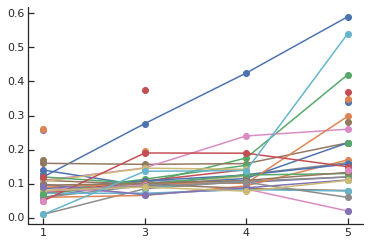

In [98]:
DI = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/DI_nuevos.csv', encoding='utf-8', sep='\t')
DI.head()
del DI['photo_name']

from mpl_toolkits.axisartist.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

# for direction in ["xzero", "yzero"]:
#     # adds arrows at the ends of each axis
#     ax.axis[direction].set_axisline_style("-|>")

#     # adds X and Y-axis from the origin
#     ax.axis[direction].set_visible(False)

for direction in ["right", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
    
for row in range(0,len(DI)):
    plt.plot(DI.loc[row],'o''-')
    plt.box(on=None)
plt.show()

In [71]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
c_1 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 1)]['DI']
c_3 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 3)]['DI']
c_4 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 4)]['DI']
c_5 = disc_index[(disc_index['tratamiento'] == 'c') & (disc_index['frecuencia'] == 5)]['DI']


df = pd.concat([c_1.reset_index()['DI'],c_3.reset_index()['DI'],c_4.reset_index()['DI'],c_5.reset_index()['DI']],axis =1, ignore_index=True, sort=False)



0.0022028394667408533

In [74]:
DI = DI.interpolate(method ='linear', limit_direction ='forward')
t, p = ttest_ind(DI['4'], DI['5'], equal_var=False)
p

0.012976812650132176

<AxesSubplot:>

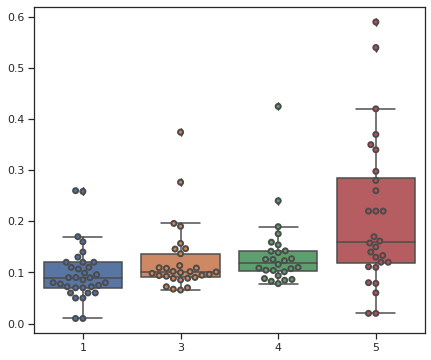

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=DI)

sns.swarmplot(data=DI, linewidth=2)
# plt.savefig('AR')

In [ ]:
plt.scatter()

In [ ]:
import os

tau_list = []
path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/jsons/'
jsons_list = os.listdir(path)
for file in jsons_list:
    path_file = path + file
    dic = jasonReader(path_file)
    taus = slicesParser_tau(dic)
    tau_list.append(taus)
print('Done')

In [ ]:
tau_list[-1].mean().mean()

In [ ]:
tau_list = []
path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/jsons/'
jsons_list = os.listdir(path)
for file in jsons_list:
    path_file = path + file
    dic = jasonReader(path_file)
    taus = dic['image']['tau_s']
    tau_list.append([file,sum(taus)/len(taus),slicesParser_tau(dic).mean().mean()])

In [ ]:
import csv
import pandas as pd    

df = pd.DataFrame(tau_list, columns= ['photo_name','tau_wc', 'tau_slices'])
df.to_csv(path + 'tau.csv', sep='\t')

In [ ]:
import numpy as np
from pandas import Series

from lmfit import Model, Parameter, report_fit

def decay(t, N, tau):
    return N*np.exp(-t/tau)

t = np.linspace(218, 244, num=26)
data = [50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 47, 47, 47, 46, 46, 46, 45, 45, 45, 45]

model = Model(decay, independent_vars=['t'])
result = model.fit(data, t=t, N=10, tau=150)
result.plot()
print(result.values)

result = model.fit(data, t=t,
                   N=Parameter('N', value=10),
                   tau=Parameter('tau', value=1))
report_fit(result.params)